In [60]:
import matplotlib.pyplot as plt
import numpy as np
from scipy import stats
from matplotlib.ticker import (MultipleLocator, FormatStrFormatter, AutoMinorLocator)
from scipy.stats import norm
from sklearn.mixture import GaussianMixture as GMM
import matplotlib as mpl
mpl.rcParams['axes.linewidth'] = 1.5
import matplotlib.mlab as mlab
#mpl.rcParams.update({'font.size': 15, 'font.family': 'STIXGeneral', 'mathtext.fontset': 'stix'})


In [2]:
# Make gaussian mixture data





In [108]:
n_signal/(n_signal+n_back)

0.006280308450592257

/tmp/ipykernel_625521/2865202192.py:19: MatplotlibDeprecationWarning: Auto-removal of overlapping axes is deprecated since 3.6 and will be removed two minor releases later; explicitly call ax.remove() as needed.
  plt.subplot(1, 2, 1)


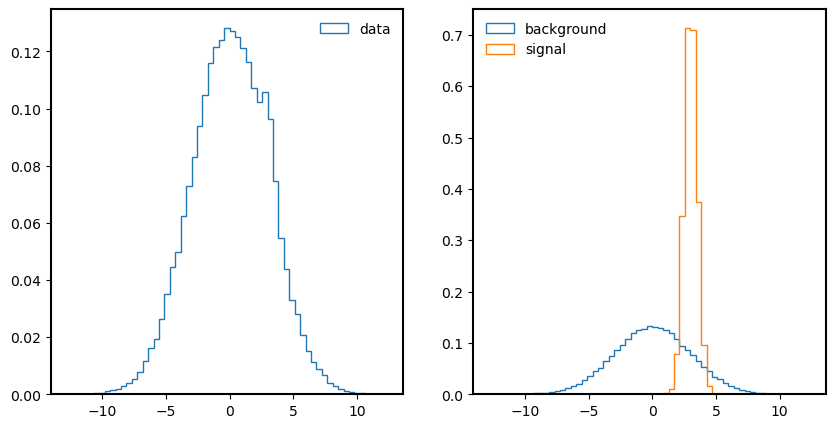

In [81]:
n_back = 100000

back_mean = 0
sig_mean = 3

background = np.random.normal(back_mean, 3, n_back)

significance = 10

n_signal = int(np.sqrt(n_back) * significance)

signal = np.random.normal(sig_mean, 0.5, n_signal)
x = np.concatenate([background, signal])

bins = np.linspace(min(x.flatten()), max(x.flatten()), 60)

plt.subplots(figsize=(10, 5))

plt.subplot(1, 2, 1)
plt.hist(x.flatten(), bins=bins, density=True, histtype='step', label='data')
plt.legend(frameon=False)

plt.subplot(1, 2, 2)
plt.hist(background, bins=bins, density=True, histtype='step', label='background')
plt.hist(signal, bins=bins, density=True, histtype='step', label='signal')
plt.legend(frameon=False)
plt.show()

In [78]:
label_train = np.concatenate([np.zeros(n_back), np.ones(n_signal)])
print(label_train)

[0. 0. 0. ... 1. 1. 1.]


/tmp/ipykernel_625521/2474185831.py:19: MatplotlibDeprecationWarning: Auto-removal of overlapping axes is deprecated since 3.6 and will be removed two minor releases later; explicitly call ax.remove() as needed.
  plt.subplot(1, 2, 1)


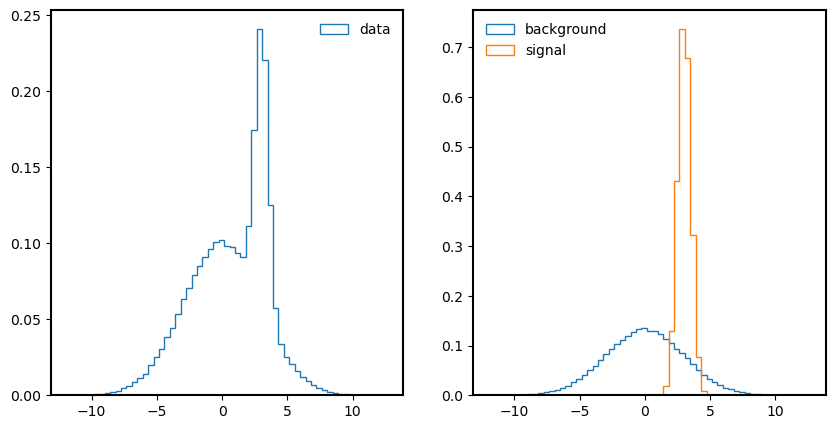

In [18]:
n_back = 100000

back_mean = 0
sig_mean = 3

background = np.random.normal(back_mean, 3, n_back)

significance = 100

n_signal = int(np.sqrt(n_back) * significance)

signal = np.random.normal(sig_mean, 0.5, n_signal)
x_val = np.concatenate([background, signal])

bins = np.linspace(min(x_val.flatten()), max(x_val.flatten()), 60)

plt.subplots(figsize=(10, 5))

plt.subplot(1, 2, 1)
plt.hist(x_val.flatten(), bins=bins, density=True, histtype='step', label='data')
plt.legend(frameon=False)

plt.subplot(1, 2, 2)
plt.hist(background, bins=bins, density=True, histtype='step', label='background')
plt.hist(signal, bins=bins, density=True, histtype='step', label='signal')
plt.legend(frameon=False)
plt.show()

label_val = np.concatenate([np.zeros(n_back), np.ones(n_signal)])

[0. 0. 0. ... 1. 1. 1.]


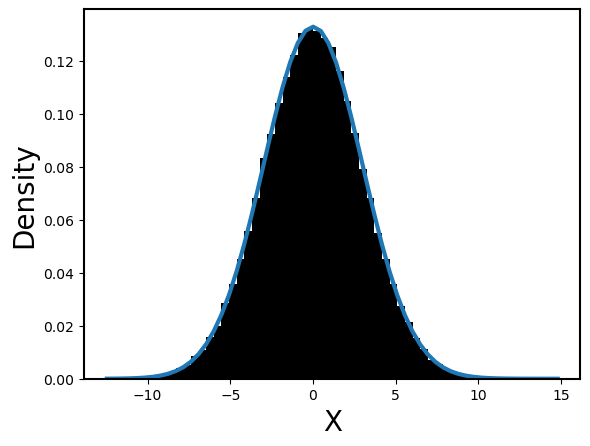

mean:  0.006885562252526893
covs:  9.00991653956312


In [45]:
# first of all, let's confirm the optimal number of components

x_sb = background.reshape(-1, 1)

# Since the optimal value is n=2 according to both BIC and AIC, let's write down:
n_optimal = 1

bins = np.linspace(min(x_sb.flatten()), max(x_sb.flatten()), 60)

# create GMM model object
gmm = GMM(n_components = n_optimal, max_iter=1000, random_state=10, covariance_type = 'full')

# find useful parameters
mean = gmm.fit(x_sb).means_  
covs  = gmm.fit(x_sb).covariances_
weights = gmm.fit(x_sb).weights_

# create necessary things to plot
x_axis = bins
y_axis0 = norm.pdf(x_axis, float(mean[0][0]), np.sqrt(float(covs[0][0][0])))*weights[0] # 1st gaussian
#y_axis1 = norm.pdf(x_axis, float(mean[1][0]), np.sqrt(float(covs[1][0][0])))*weights[1] # 2nd gaussian

# Plot 2
plt.hist(x_sb, density=True, color='black', bins=bins)
plt.plot(x_axis, y_axis0, lw=3, c='C0')
#plt.plot(x_axis, y_axis1, lw=3, c='C1')
#plt.plot(x_axis, y_axis0+y_axis1, lw=3, c='C2', ls='dashed')
#plt.ylim(0.0, 2.0)
plt.xlabel(r"X", fontsize=20)
plt.ylabel(r"Density", fontsize=20)

plt.subplots_adjust(wspace=0.3)
plt.show()
plt.close('all')


mu_back = mean[0][0]
sigma_back = (float(covs[0][0][0]))
print('mean: ', mu_back)
print('covs: ', sigma_back)

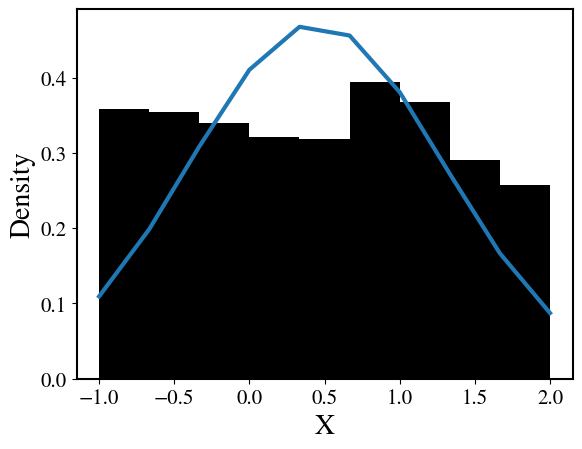

In [4]:
# first of all, let's confirm the optimal number of components

x_sr = x[(x>-1) & (x<2)].reshape(-1, 1)

bins = np.linspace(min(x_sr.flatten()), max(x_sr.flatten()), 10)

# Since the optimal value is n=2 according to both BIC and AIC, let's write down:
n_optimal = 1

# create GMM model object
gmm = GMM(n_components = n_optimal, max_iter=1000, random_state=10, covariance_type = 'full')

# find useful parameters
mean = gmm.fit(x_sr).means_  
covs  = gmm.fit(x_sr).covariances_
weights = gmm.fit(x_sr).weights_

# create necessary things to plot
x_axis = bins
y_axis0 = norm.pdf(x_axis, float(mean[0][0]), np.sqrt(float(covs[0][0][0])))*weights[0] # 1st gaussian
#y_axis1 = norm.pdf(x_axis, float(mean[1][0]), np.sqrt(float(covs[1][0][0])))*weights[1] # 2nd gaussian

# Plot 2
plt.hist(x_sr, density=True, color='black', bins=bins)
plt.plot(x_axis, y_axis0, lw=3, c='C0')
#plt.plot(x_axis, y_axis1, lw=3, c='C1')
#plt.plot(x_axis, y_axis0+y_axis1, lw=3, c='C2', ls='dashed')
#plt.ylim(0.0, 2.0)
plt.xlabel(r"X", fontsize=20)
plt.ylabel(r"Density", fontsize=20)

plt.subplots_adjust(wspace=0.3)
plt.show()
plt.close('all')

In [48]:
# first of all, let's confirm the optimal number of components

x_all = x.reshape(-1, 1)

bins = np.linspace(min(x_all.flatten()), max(x_all.flatten()), 60)
# Since the optimal value is n=2 according to both BIC and AIC, let's write down:
n_optimal = 2

# create GMM model object
gmm = GMM(n_components = n_optimal, max_iter=10000, random_state=10, tol=1e-18 \
          ,covariance_type = 'full')

# find useful parameters
mean = gmm.fit(x_all).means_  
covs  = gmm.fit(x_all).covariances_
weights = gmm.fit(x_all).weights_

# create necessary things to plot
x_axis = bins
y_axis0 = norm.pdf(x_axis, float(mean[0][0]), np.sqrt(float(covs[0][0][0])))*weights[0] # 1st gaussian
y_axis1 = norm.pdf(x_axis, float(mean[1][0]), np.sqrt(float(covs[1][0][0])))*weights[1] # 2nd gaussian

# Plot 2
plt.hist(x_all, density=True, color='black', bins=bins)
#plt.hist(x_all[label_train==0], density=True, histtype='step', bins=bins,
     #    label='background')
#plt.hist(x_all[label_train==1], density=True, histtype='step', bins=bins,
    #     label='signal')

plt.plot(x_axis, y_axis0, lw=2, c='C0', label='gaussian 1')
plt.plot(x_axis, y_axis1, lw=2, c='C1', label='gaussian 2')
plt.plot(x_axis, y_axis0+y_axis1, lw=1, c='C2', ls='dashed', label='gaussian 1+2')
#plt.ylim(0.0, 2.0)
plt.xlabel(r"X", fontsize=20)
plt.ylabel(r"Density", fontsize=20)
plt.legend(frameon=False)
plt.subplots_adjust(wspace=0.3)
plt.show()
plt.close('all')

print(mean)

KeyboardInterrupt: 

In [29]:
print(mean)

[[-1.52723359]
 [ 1.18685627]]


In [32]:
print(np.sqrt(covs))

[[[2.7401959 ]]

 [[2.66709803]]]


In [31]:
print(weights)


[0.40291946 0.59708054]


# Custom EM algorithm for Gaussian Mixture Models

In [34]:
# Import kmeans from sklearn
from sklearn.cluster import KMeans

In [49]:
def prior(pcx):
    return pcx.mean()



def p_theta_given_x(data, mu1, sigma1, mu2, sigma2, prior):
    ''' 
    calculate responsibility p(c|x) for each datapoint. where c is the cluster.
                   p(x|c) p(c)              p(x|c) p(c)                  p(x|c) p(c) [prior]
    p(c|x) =  --------------------- = ------------------------- =  -------------------------------
                      p(x)                  sum(c) p(x,c)             p(x|c) p(c) + p(x|c') p(c')  
    '''
    numerator = norm.pdf(data, mu1, np.sqrt(sigma1)) * prior
    denominator = numerator + norm.pdf(data, mu2, np.sqrt(sigma2) ) * (1-prior)
    return numerator / denominator





# write EM algorithm with weights
def EM_2_gaussian(data, n_components, max_iter, tol):
    # initialize parameters with k - means

    n = len(data)

    kmeans = KMeans(n_clusters=n_components, random_state=0).fit(data.reshape(-1, 1))
    mu = kmeans.cluster_centers_.flatten()
   # mu = np.random.uniform(min(data), max(data), n_components)
    sigma = np.random.uniform(0, 1, n_components)
    pa = 1 / n_components
    p = [pa, 1-pa]
    

    likelihood_arr = []
    mu_arr = []
    sigma_arr = []
    w_arr = []

    for i in range(max_iter):
        '''
        Expectation step: calculate "responsibility" of each cluster to each datapoints.
        i.e which 
        p_c1 = P(c1|x) = ...
        p_c2 = P(c2|x) = ...
        '''
        # Compute the likelihood of the data given the current parameters
        p_c1 = norm.pdf(data, mu[0], np.sqrt(sigma[0])) * p[0]
        p_c2 = norm.pdf(data, mu[1], np.sqrt(sigma[1])) * p[1]
        log_likelihood = np.log(p_c1 + p_c2).sum()

        
        a = p_theta_given_x( data, mu[0], sigma[0], mu[1], sigma[1], p[0] )
        b = 1 - a
        
        
        pa = prior(a)
        pb = 1 - pa

        p = [pa, pb]


        
        '''
        adjust mu and sigma 
        '''
        mu[0] = np.multiply(a, data).sum() / a.sum()
        sigma[0] = np.multiply(a, (data - mu[0])**2).sum() / a.sum() 
        
        mu[1] = np.multiply(b, data).sum() / b.sum()
        sigma[1] = np.multiply(b, (data - mu[1])**2).sum() / b.sum() 
        

        likelihood_arr.append(log_likelihood)
        mu_arr.append(mu)
        sigma_arr.append(sigma)
        w_arr.append(p)

        # check convergence
        if i > 0:
            if np.abs(log_likelihood - log_likelihood_old) < tol:
                break
            else :
                log_likelihood_old = log_likelihood
        else:
            log_likelihood_old = log_likelihood

    
    


     
    
    return np.array(mu_arr), \
np.array(sigma_arr),np.array(w_arr), np.array(likelihood_arr)



In [50]:
def p_data(data,mu,sigma,p):

    """ 2 gaussian mixture model"""

    p_c1 = norm.pdf(data, mu[0], np.sqrt(sigma[0])) * p[0]
    p_c2 = norm.pdf(data, mu[1], np.sqrt(sigma[1])) * p[1]

    return p_c1 + p_c2

def p_back(data,mu,sigma):

    """ background gaussian """
    pc = norm.pdf(data, mu, np.sqrt(sigma))

    return pc




In [88]:
x_all = x

bins = np.linspace(min(x_all.flatten()), max(x_all.flatten()), 60)

# Since the optimal value is n=2 according to both BIC and AIC, let's write down:
n_optimal = 2

mu_data , sigma_data, w_data, like_arr = EM_2_gaussian(x_all, n_optimal, 10000, 1e-18)
#max_likelihood = np.argmax(like_arr)

/home/rd804/.conda/envs/manode/lib/python3.9/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


9999


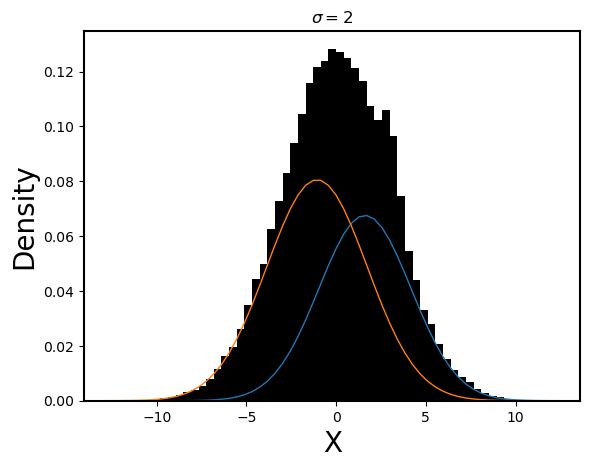

In [89]:
max_likelihood = np.argmax(like_arr)
mu_ = mu_data[max_likelihood]
sigma_ = sigma_data[max_likelihood]
w_ = w_data[max_likelihood]

print(max_likelihood)
# create necessary things to plot
x_axis = bins
y_axis0 = norm.pdf(x_axis, float(mu_[0]), np.sqrt(float(sigma_[0])))*w_[0] # 1st gaussian
y_axis1 = norm.pdf(x_axis, float(mu_[1]), np.sqrt(float(sigma_[1])))*w_[1] # 2nd gaussian

x_hist,_ = np.histogram(x_all, bins=bins, density=True)
#x_hist = x_hist / x_hist.sum()

# Plot 2
plt.hist(x_all, density=True, color='black', bins=bins)
#plt.hist(x_all[label_train==0], density=True, histtype='step', bins=bins)
#plt.hist(x_all[label_train==1], density=True, histtype='step', bins=bins)
plt.plot(x_axis, y_axis0, lw=1)
plt.plot(x_axis, y_axis1, lw=1)
plt.title(r'$\sigma=2$')
#plt.yscale('log')
#plt.plot(x_axis, y_axis0+y_axis1, lw=3, c='C2', ls='dashed')
plt.xlabel(r"X", fontsize=20)
plt.ylabel(r"Density", fontsize=20)
plt.show()

In [67]:
score_ = p_data(x_val,mu_,sigma_,w_)/p_back(x_val,mu_back,sigma_back)
#score = R_ / (R_ + 1) # 


/tmp/ipykernel_625521/2582745222.py:10: RuntimeWarning: invalid value encountered in divide
  sic = tpr/np.sqrt(fpr)


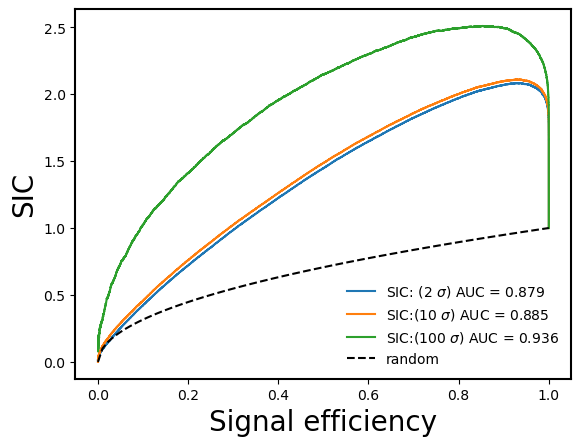

In [70]:
# import ROC curve
from sklearn.metrics import roc_curve, roc_auc_score

# SIC curve

def SIC(label, score):
    fpr, tpr, thresholds = roc_curve(label, score)
    auc = roc_auc_score(label, score)

    sic = tpr/np.sqrt(fpr)

    return sic, tpr, auc

#sic_2, tpr_2, auc_2 = SIC(label_val, score_)
sic_10, tpr_10, auc_10 = SIC(label_val, score_)
random = np.linspace(0, 1, 100)
#sic_100, tpr_100, auc_100 = SIC(label_val, score_)

plt.plot(tpr_2, sic_2, lw=1.5, label=r'SIC: (2 $\sigma$) AUC = %.3f' % auc_2)
plt.plot(tpr_10, sic_10, lw=1.5, label=r'SIC:(10 $\sigma$) AUC = %.3f' % auc_10)
plt.plot(tpr_100, sic_100, lw=1.5, label=r'SIC:(100 $\sigma$) AUC = %.3f' % auc_100)
plt.plot(random, random**0.5, lw=1.5, ls='dashed', label ='random', c='black')
#plt.yscale('log')
plt.xlabel(r"Signal efficiency", fontsize=20)
plt.ylabel(r"SIC", fontsize=20)
plt.legend(frameon=False)
plt.show()







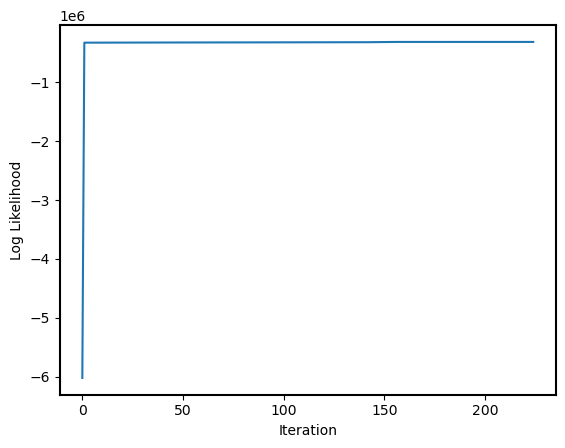

In [22]:
plt.plot(like_arr)
plt.xlabel('Iteration')
plt.ylabel('Log Likelihood')
#plt.yscale('log')
plt.show()


# Maximum likelihood for Gaussian

In [17]:
# define likelihood function for gaussian model

def likelihood(parameters, x_):
    mu = parameters[0]
    sigma = parameters[1]**2
    likelihoods = np.log((norm.pdf(x_, mu, np.sqrt(sigma))))

    _likelihood = np.sum(likelihoods)


    return - _likelihood

In [18]:

mu = np.random.uniform(min(background), max(background), 1)
sigma = np.random.uniform(0, 1, 1)

parameters = np.array([mu, sigma]).flatten()

print(parameters)

# use scipy optimize to find the maximum likelihood

from scipy.optimize import minimize

result = minimize(likelihood, x0 = parameters, args=(background))







[-0.53746001  0.32727635]


In [19]:
result

  message: Optimization terminated successfully.
  success: True
   status: 0
      fun: 141422.18926991452
        x: [-2.995e+00  9.953e-01]
      nit: 14
      jac: [ 0.000e+00  0.000e+00]
 hess_inv: [[ 9.791e-06  2.838e-08]
            [ 2.838e-08  4.876e-06]]
     nfev: 57
     njev: 19

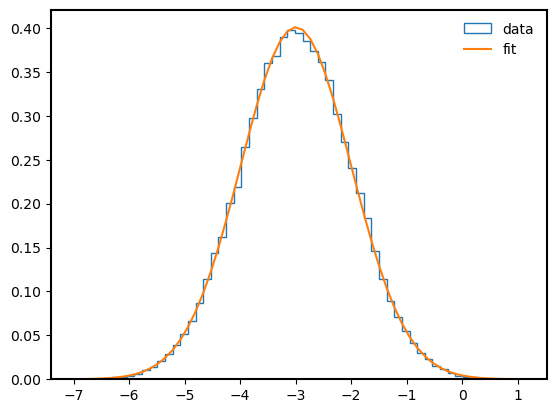

In [20]:
bins = np.linspace(background.min(), background.max(), 60)
plt.hist(background , density=True, histtype='step', bins=bins, label='data')
plt.plot(bins, norm.pdf(bins, result.x[0], np.sqrt(result.x[1]**2)), label='fit')
plt.legend(frameon=False)
plt.show()

# Maximum likelihood estimation of parameters for Gaussian Mixture Models

In [25]:
del w

In [143]:
# Define likelihood function





def likelihood(parameters, x_):

    mu_1 = parameters[0]
    mu_2 = parameters[1]
    sigma_1 = parameters[2]**2
    sigma_2 = parameters[3]**2
    w_ = np.sqrt(parameters[4]**2)
   # w_ = 0.5


    prob_ =  (w_ * norm.pdf(x_, mu_1, np.sqrt(sigma_1)) + \
                            (1-w_) * norm.pdf(x_, mu_2, np.sqrt(sigma_2))) 
     
    

    likelihoods = np.log(prob_)
    
                                                  
    _likelihood = np.sum(likelihoods)

    return - _likelihood

    
        
#data = x
n_gaussians = 2

# 2-means clustering of data









#mu = np.random.uniform(min(x), max(x), n_gaussians)
mu = [-3,1]

sigma = np.random.uniform(0, 1, n_gaussians)
#sigma = [2,2]
#w = 0.5


# initialize parameters
init_parameters = [mu[0], mu[1], sigma[0], sigma[1], 0.5]

print(likelihood(init_parameters, x))


3370502.250277121


In [131]:
from sklearn.cluster import KMeans

kmeans = KMeans(n_clusters=n_gaussians, random_state=0).fit(x.reshape(-1, 1))

print(kmeans.cluster_centers_.flatten())


[ 0.92098841 -3.04500789]


/home/rd804/.conda/envs/manode/lib/python3.9/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


In [11]:
lambda parameters,x: likelihood(parameters, x)

<function __main__.<lambda>(parameters, x)>

In [ ]:
# define gradients of likelihood function



In [144]:
# use scipy.optimize.minimize to maximize the -likelihood function
import scipy.optimize as opt


# minimize the negative likelihood function with constraints
result = opt.minimize(likelihood, x0 = init_parameters, args=(x),
                       method='SLSQP', bounds=((None, None), (None, None), (0, None), (0, None), (0, 1)))



#def mle(init, data):
 #   result = \
  #  opt.minimize(lambda parameters,x: -likelihood(parameters, x), 
   #              x0 = init_parameters, args=(data))
    
   # return result




In [145]:
result

 message: Optimization terminated successfully
 success: True
  status: 0
     fun: 276577.2069886746
       x: [-5.432e+02 -2.035e+00  4.247e+04  1.979e+00  0.000e+00]
     nit: 18
     jac: [ 0.000e+00  1.031e+00  0.000e+00  1.746e+00  1.316e+05]
    nfev: 125
    njev: 15

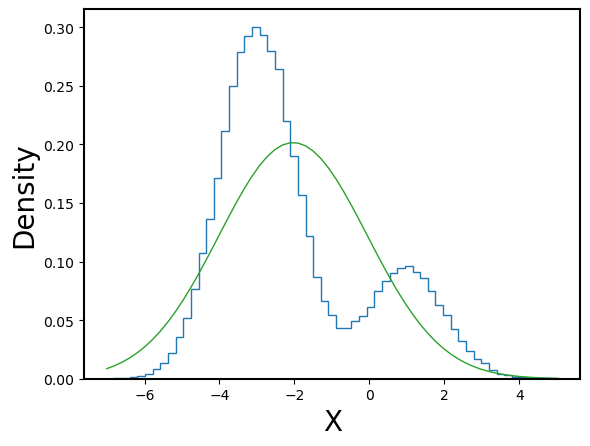

In [146]:
x_all = x
paramters_result = result.x 

bins = np.linspace(min(x_all.flatten()), max(x_all.flatten()), 60)

mu_s = paramters_result[0]
mu_b = paramters_result[1]
sigma_s = paramters_result[2]**2
sigma_b = paramters_result[3]**2
#w = 0.5
w = np.sqrt(paramters_result[4]**2)

x_axis = bins
y_axis0 = norm.pdf(x_axis, float(mu_s), np.sqrt(float(sigma_s)))*w # 1st gaussian
y_axis1 = norm.pdf(x_axis, float(mu_b), np.sqrt(float(sigma_b)))*(1-w) # 2nd gaussian

# Plot 2
plt.hist(x_all, density=True, histtype='step', bins=bins)
plt.plot(x_axis, y_axis0, lw=1, c='C1')
plt.plot(x_axis, y_axis1, lw=1, c='C2')
#plt.plot(x_axis, y_axis0+y_axis1, lw=3, c='C2', ls='dashed')
#plt.ylim(0.0, 2.0)
plt.xlabel(r"X", fontsize=20)
plt.ylabel(r"Density", fontsize=20)
plt.show()

In [ ]:
1/(1-(0.02**2/0.008**2))